#Task 1 - NTI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from time import process_time

df = pd.read_csv('/content/diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Decision Tree

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=16)
DT = DecisionTreeClassifier(max_depth=5)
st = process_time()
DT.fit(x_train, y_train)
end = process_time()
t1=end-st
yp = DT.predict(x_test)
print("y_predict",yp,sep='\n')

y_predict
[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 1]


In [ ]:
m = confusion_matrix(y_test,yp)
print("Confusion Matrix:",m,sep='\n',end='\n\n')
score1 = accuracy_score(y_test,yp)
print("Accuracy Score:",str(round(score1*100,3))+' %',sep='\n',end='\n\n')
crossVal = cross_val_score(DT, x_train,y_train, cv=10)
print("Cross Validation Score:",crossVal,"mean:",crossVal.mean(),sep='\n',end='\n\n')


Confusion Matrix:
[[83 19]
 [10 42]]

Accuracy Score:
81.169 %

Cross Validation Score:
[0.77419355 0.70967742 0.72580645 0.70967742 0.72131148 0.78688525
 0.70491803 0.70491803 0.73770492 0.70491803]
mean:
0.7280010576414595



Decision Tree Heatmap



<Axes: xlabel='predicted', ylabel='Actual'>

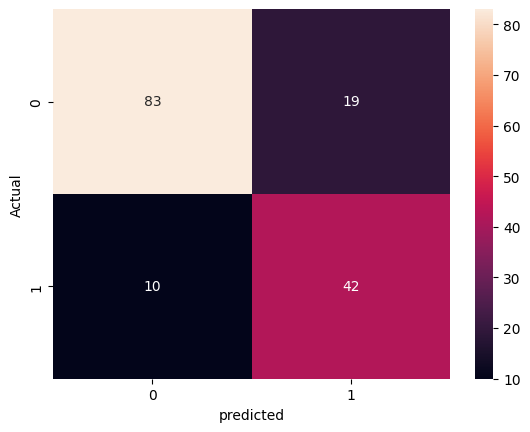

In [ ]:
import seaborn as sn
print("Decision Tree Heatmap\n")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['predicted'])
sn.heatmap(m,annot=True)

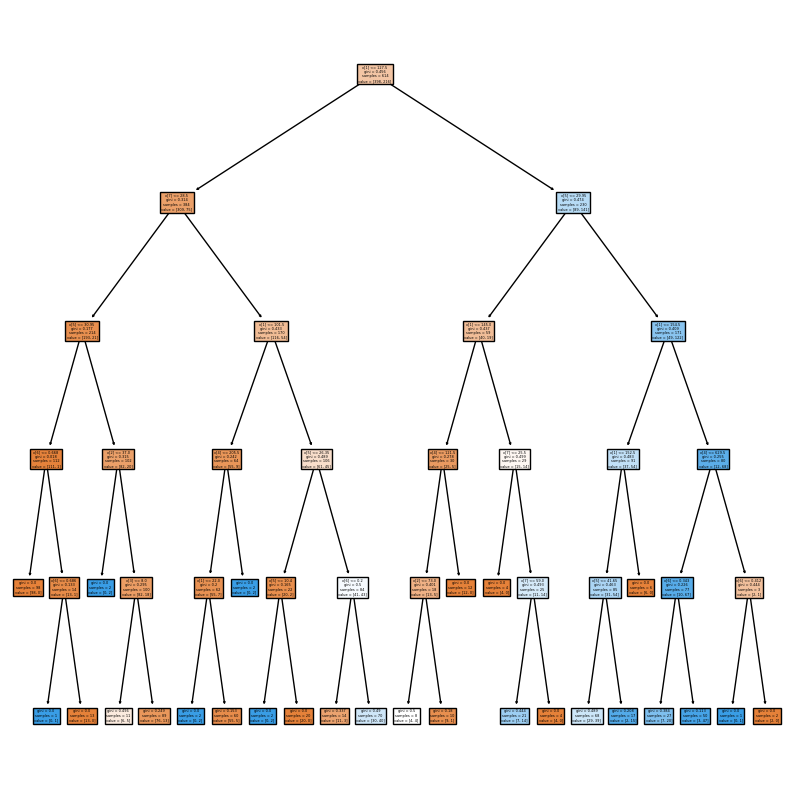

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(DT, filled=True)
plt.show()

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model=LogisticRegression()
st= process_time()
model.fit(x_train , y_train)
end= process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
print("Logistic Regression")
print("By using Logistic Regression\n\n",
      "Accuracy:",str(round(score2*100,3))+' %',
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp))


Logistic Regression
By using Logistic Regression

 Accuracy: 81.818 % 

Confusion Matrix
 [[95  7]
 [21 31]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
crossVal = cross_val_score(model, x_train,y_train, cv=10)
print("Cross Validation Score:",crossVal,"mean:",crossVal.mean(),sep='\n',end='\n\n')

Cross Validation Score:
[0.77419355 0.74193548 0.67741935 0.72580645 0.78688525 0.78688525
 0.80327869 0.7704918  0.80327869 0.7704918 ]
mean:
0.7640666314119514



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logostic Regression Heatmap



<Axes: xlabel='predicted', ylabel='Actual'>

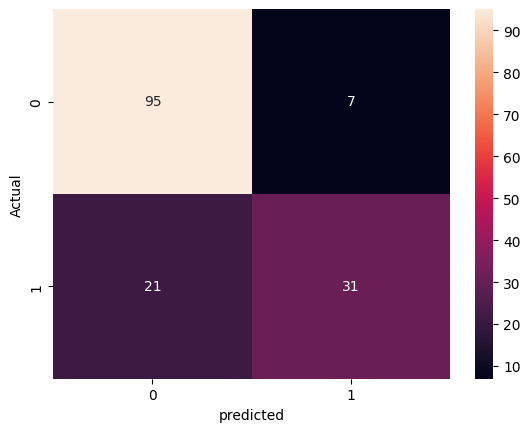

In [ ]:
import seaborn as sn
print("Logostic Regression Heatmap\n")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['predicted'])
sn.heatmap(m,annot=True)

In [ ]:
info={
    "Algorithm Name":["Logistic Regression","Decision Tree"],
    "Accuracy":[round(score1*100,3),round(score2*100,3)],
    "Fitting Time in second":[str(round(t1,3))+'s',str(round(t2,3))+'s']
}

info_df=pd.DataFrame(info)
info_df

,Algorithm Name,Accuracy,Fitting Time in second
0,Logistic Regression,81.169,0.005s
1,Decision Tree,81.818,0.034s
